In [1]:
import pandas as pd
df = pd.read_csv("reviews_sentiment.csv",sep = ';')

In [2]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


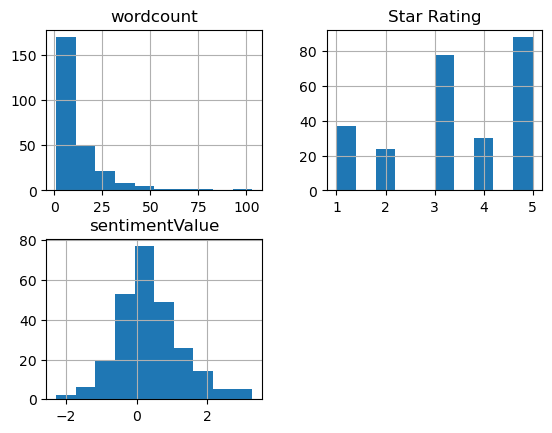

In [3]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
x = df[['wordcount','sentimentValue']]
y = df['Star Rating']

In [8]:
x_train, x_test , y_train , y_test = train_test_split(x,y,random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
n_neighbors = 7
knnModel = KNeighborsClassifier(n_neighbors)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
print('Accuracy del modelo KNN para el train es: {:.2f}'.format(knnModel.score(x_train,y_train)))

Accuracy del modelo KNN para el train es: 0.90


La precisión del paquete de entrenamiento o 'Train set' es del 90%

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
pred = knnModel.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



In [15]:
clf = KNeighborsClassifier(n_neighbors,weights='distance')
clf.fit(x,y)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [16]:
print(clf.predict([[5,1.0]]))

[5]


C:\Users\israe\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
import warnings
print(clf.predict_proba([[20,0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


C:\Users\israe\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


La probabilidad para un comentario de 20 palabras con un sentimiento de 0.0 es:

* Categoría 1 : 0.3%
* Categiría 2 : 2.52%
* Categiría 3 : 97.09%
* Categiría 4 : 0%
* Categiría 5 : 0%
